In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("../Assignment 17-Support Vector Machines/forestfires.csv")

In [3]:
df.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

In [4]:
df.drop(['month','day'],axis=1,inplace=True)

In [5]:
array=df.values

In [6]:
array

array([[86.2, 26.2, 94.3, ..., 0, 0, 'small'],
       [90.6, 35.4, 669.1, ..., 1, 0, 'small'],
       [90.6, 43.7, 686.9, ..., 1, 0, 'small'],
       ...,
       [81.6, 56.7, 665.6, ..., 0, 0, 'large'],
       [94.4, 146.0, 614.7, ..., 0, 0, 'small'],
       [79.5, 3.0, 106.7, ..., 0, 0, 'small']], dtype=object)

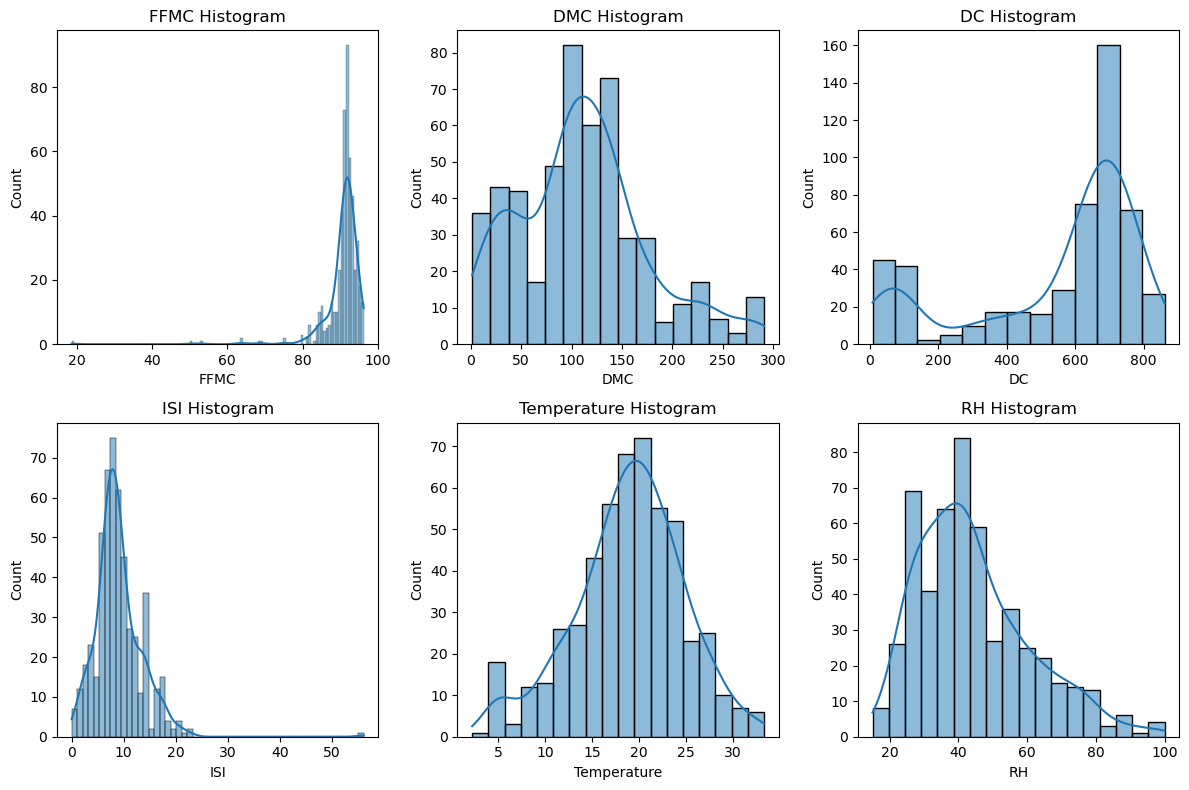

In [7]:
# Univariate Analysis
# Histogram for continuous variables
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.histplot(df['FFMC'], kde=True)
plt.title('FFMC Histogram')
plt.xlabel('FFMC')
plt.subplot(2, 3, 2)
sns.histplot(df['DMC'], kde=True)
plt.title('DMC Histogram')
plt.xlabel('DMC')
plt.subplot(2, 3, 3)
sns.histplot(df['DC'], kde=True)
plt.title('DC Histogram')
plt.xlabel('DC')
plt.subplot(2, 3, 4)
sns.histplot(df['ISI'], kde=True)
plt.title('ISI Histogram')
plt.xlabel('ISI')
plt.subplot(2, 3, 5)
sns.histplot(df['temp'], kde=True)
plt.title('Temperature Histogram')
plt.xlabel('Temperature')
plt.subplot(2, 3, 6)
sns.histplot(df['RH'], kde=True)
plt.title('RH Histogram')
plt.xlabel('RH')
plt.tight_layout()
plt.show()

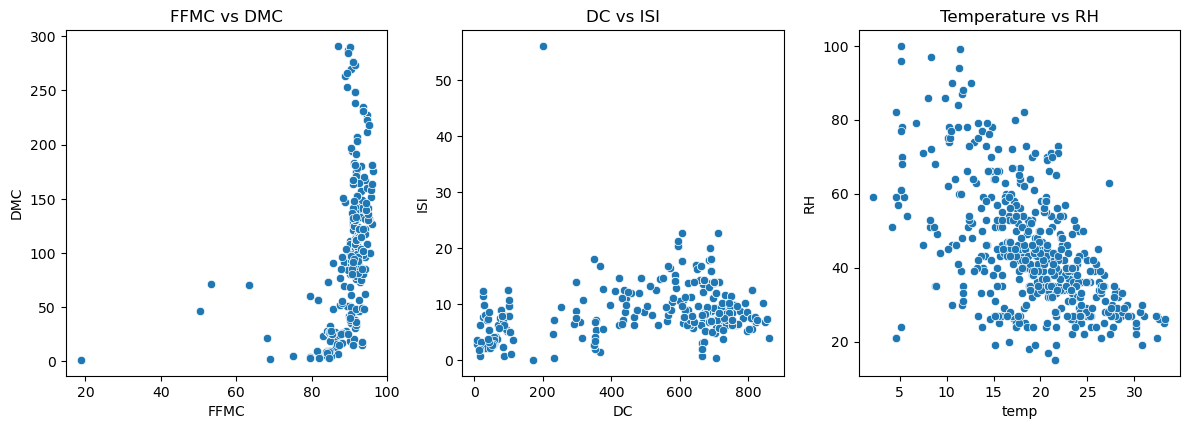

In [8]:
# Bivariate Analysis
# Scatter plot for continuous variables
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.scatterplot(x='FFMC', y='DMC', data=df)
plt.title('FFMC vs DMC')

plt.subplot(2, 3, 2)
sns.scatterplot(x='DC', y='ISI', data=df)
plt.title('DC vs ISI')

plt.subplot(2, 3, 3)
sns.scatterplot(x='temp', y='RH', data=df)
plt.title('Temperature vs RH')

plt.tight_layout()
plt.show()

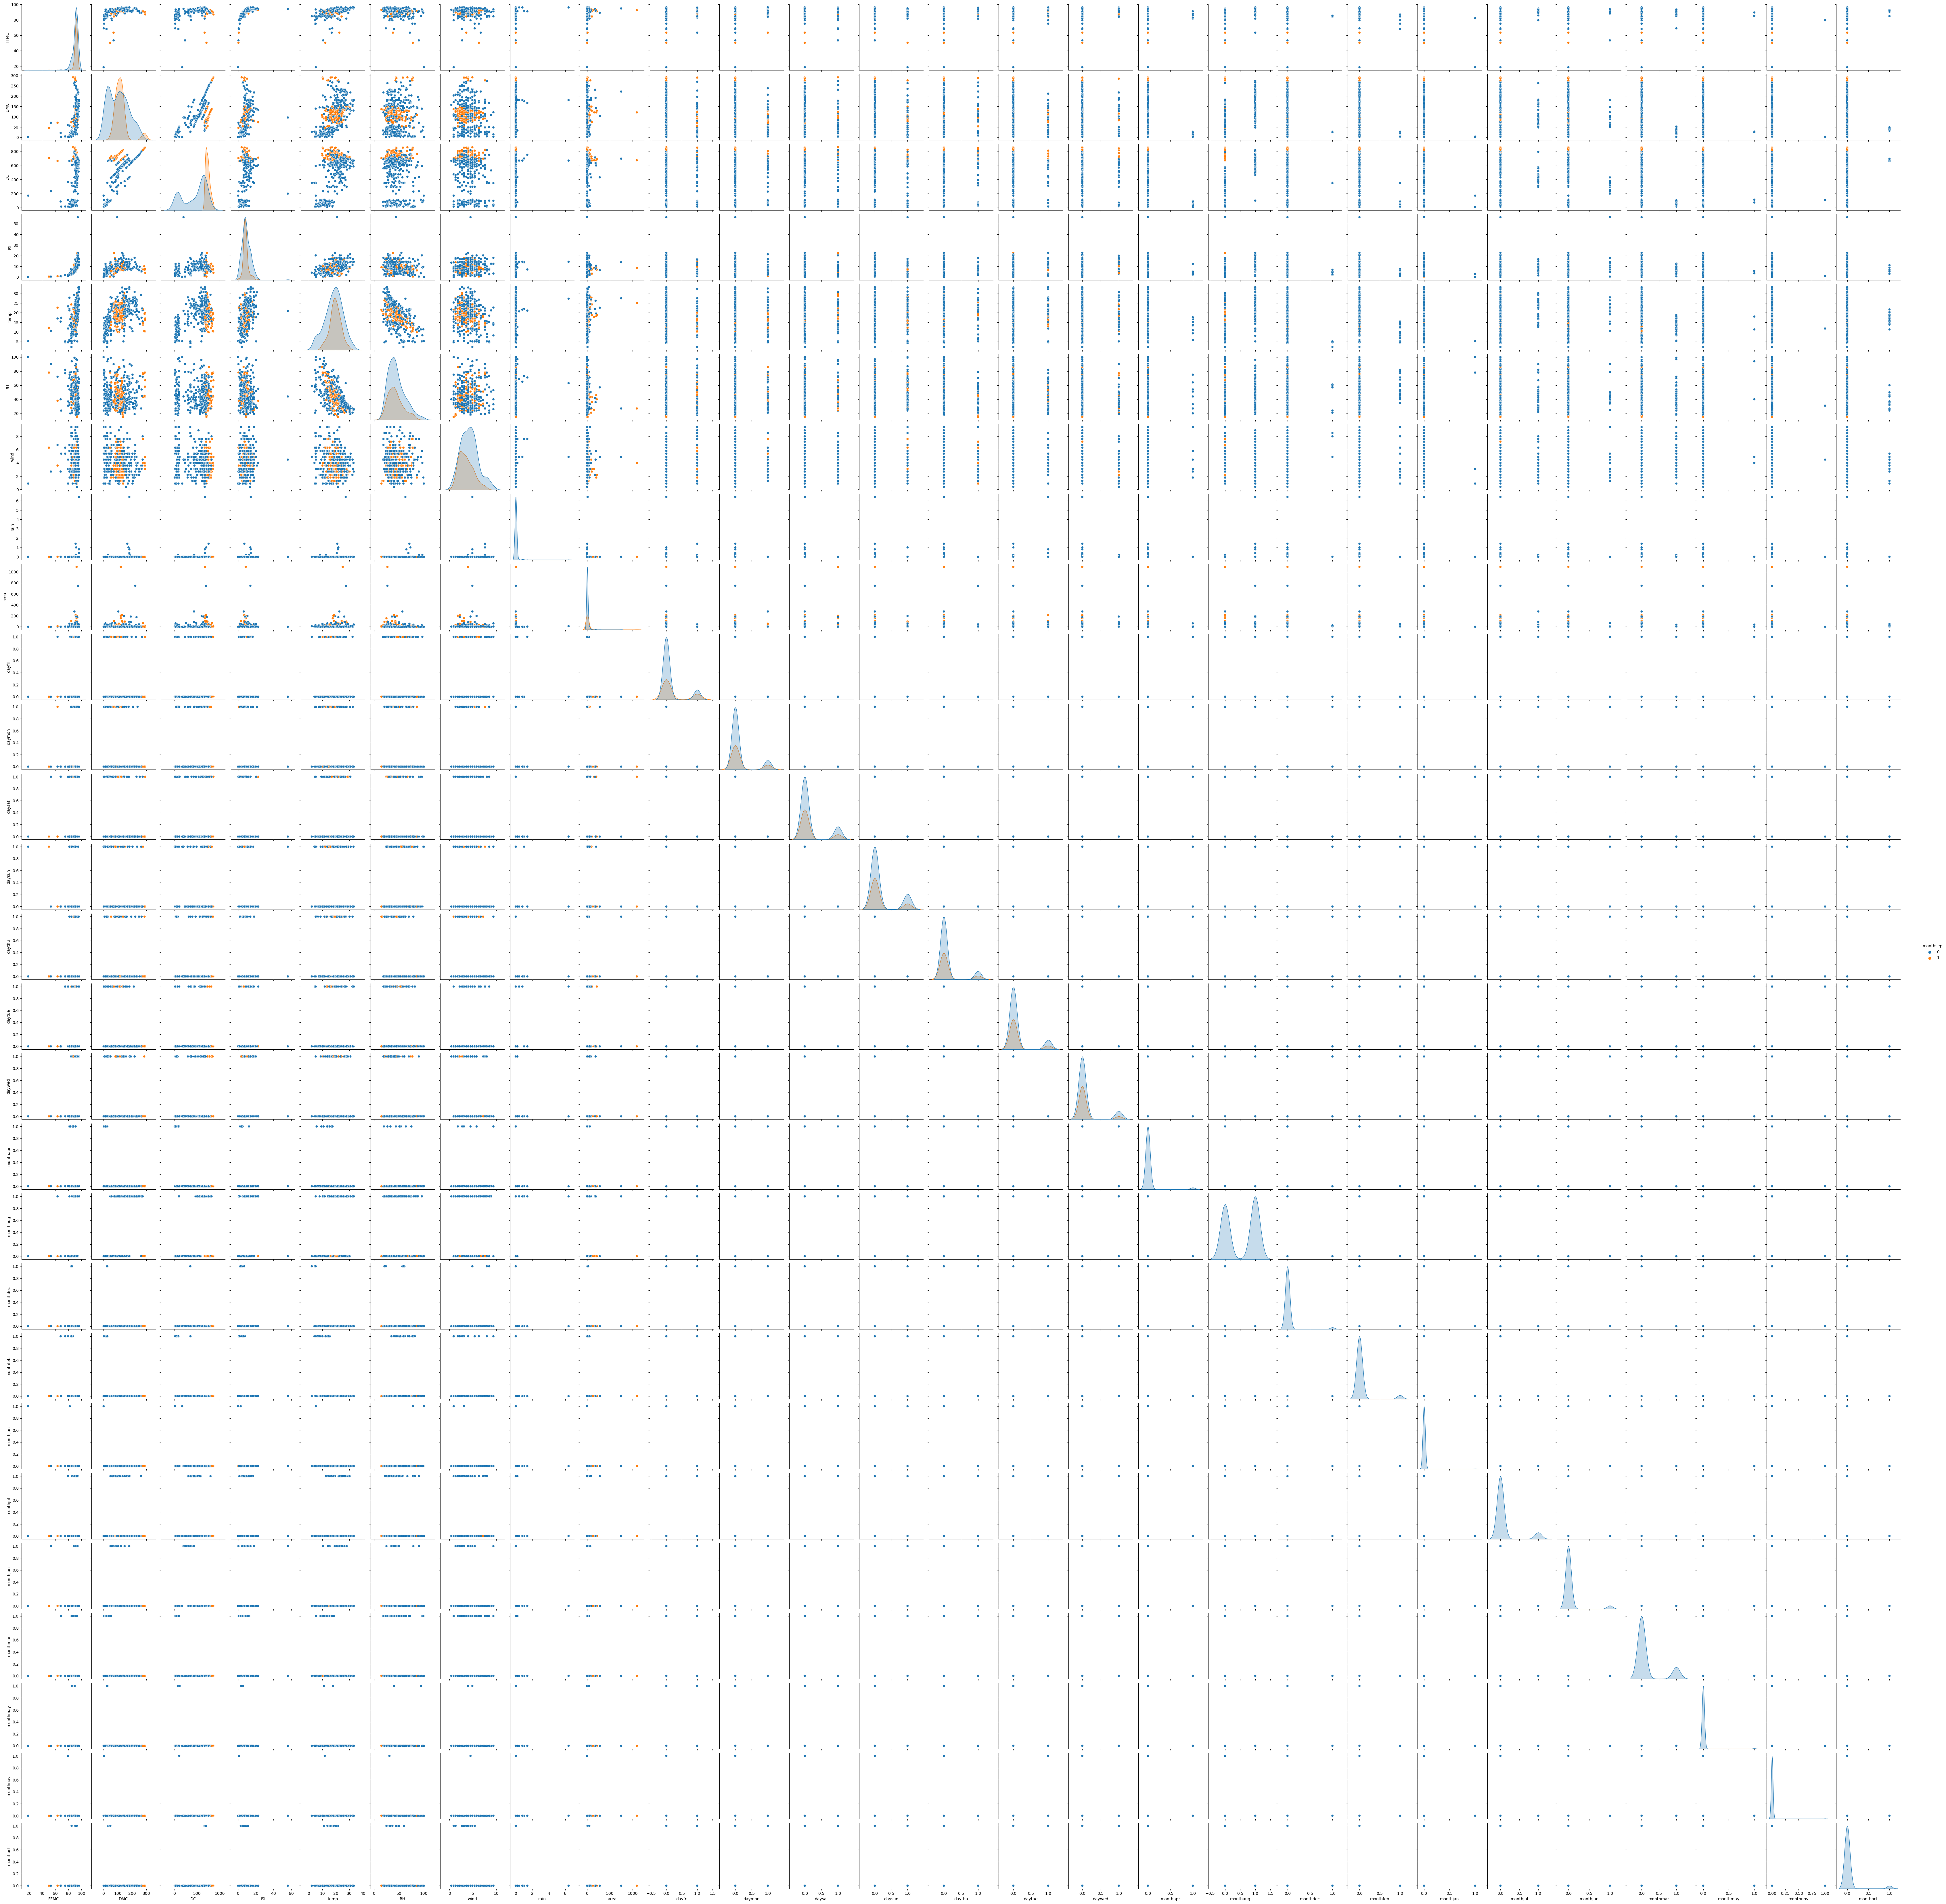

In [28]:
# Pair plot for multivariate analysis
sns.pairplot(df, hue='monthsep')
plt.show()

In [29]:
X=array[:,:-1]
Y=array[:,-1]

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [31]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((361, 28), (156, 28), (361,), (156,))

In [32]:
clf = SVC()
param_grid = [{'kernel':['linear','rbf','polynomial'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.01] }]
gsv = RandomizedSearchCV(clf,param_grid,cv=6,)
gsv.fit(X_train,Y_train)

RandomizedSearchCV(cv=6, estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.01],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf',
                                                    'polynomial']}])

In [33]:
gsv.best_params_,gsv.best_score_

({'kernel': 'linear', 'gamma': 0.01, 'C': 10}, 0.9833333333333334)

In [34]:
clf=SVC(kernel='linear',C=10)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
acc=accuracy_score(Y_test,y_pred)*100
print("accuracy =",acc)
confusion_matrix(Y_test,y_pred)

accuracy = 98.07692307692307


array([[ 38,   3],
       [  0, 115]], dtype=int64)

In [35]:
confusion_matrix(Y_test,y_pred)

array([[ 38,   3],
       [  0, 115]], dtype=int64)

In [36]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

       large       1.00      0.93      0.96        41
       small       0.97      1.00      0.99       115

    accuracy                           0.98       156
   macro avg       0.99      0.96      0.97       156
weighted avg       0.98      0.98      0.98       156



##### Optimize the hyperparameters, such as the regularization parameter (C), kernel parameters, and the degree of the polynomial kernel. Grid search or random search techniques can help identify the best combination of hyperparameters.

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame containing the data
import pandas as pd

df=pd.read_csv("../Assignment 17-Support Vector Machines/forestfires.csv")

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['month', 'day'])
# Split the data into features and target variable
X = df_encoded.drop(columns=['size_category'])
y = df_encoded['size_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVM model
svm = SVC()

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5]  # Only for polynomial kernel
}

# Choose the search method (GridSearchCV or RandomizedSearchCV)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Best hyperparameters:", grid_search.best_params_)


Accuracy: 0.9807692307692307
Best hyperparameters: {'C': 0.01, 'degree': 2, 'kernel': 'linear'}


In [22]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame containing the data
import pandas as pd

df=pd.read_csv("../Assignment 17-Support Vector Machines/forestfires.csv")

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['month', 'day'])
# Split the data into features and target variable
X = df_encoded.drop(columns=['size_category'])
y = df_encoded['size_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVM model
svm = SVC()

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5]  # Only for polynomial kernel
}

# Choose the search method (GridSearchCV or RandomizedSearchCV)
grid_search = RandomizedSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Best hyperparameters:", grid_search.best_params_)


Accuracy: 1.0
Best hyperparameters: {'kernel': 'linear', 'degree': 5, 'C': 1}
